Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель  
(например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [56]:
player_Stats = pd.read_csv('Seasons_Stats.csv')
player_Stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [57]:
player_Stats1 = player_Stats[['Player', 'Year', 'PTS']]

In [58]:
player_Stats2 = player_Stats1.groupby('Player').sum()[['PTS']].sort_values('PTS', ascending = False).reset_index().head(15)

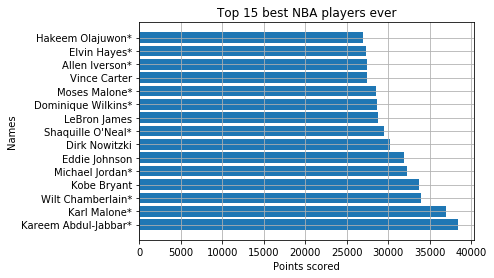

In [59]:
plt.barh(player_Stats2['Player'], player_Stats2['PTS'])
plt.xlabel('Points scored')
plt.ylabel('Names')
plt.title('Top 15 best NBA players ever')
plt.text(41000, 0, '')
plt.grid()

Для сранения личной статистики игроков по набранным очкам использовал горизонтальную столбчатую диаграмму, которая наглядно    отображает расстановку 15 лучших игроков NBA.

player_Stats2 = player_Stats[['Age', 'PTS']]
player_Stats3 = player_Stats2.groupby('Age').sum()[['PTS']].sort_values('Age', ascending = True).reset_index().head(15)

Text(0.5, 1.0, 'Распределение очков в соответствии с возрастом игроков')

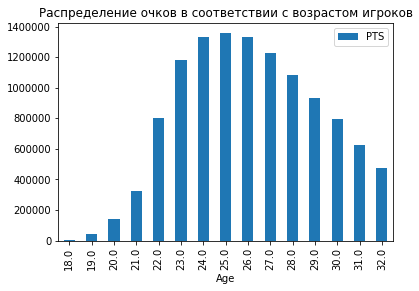

In [61]:
player_Stats3.plot( x='Age', y='PTS', kind='bar')
plt.title('Распределение очков в соответствии с возрастом игроков')

Для определения самого результативного возраста игроков NBA применил вертикальную стобчатую диаграмму. Невозможно не заметить   
схожесть данного графика с графиком нормального закона распределения Гаусса.

In [62]:
player_Stats4 = player_Stats[(player_Stats['Year'] >= 2007) & (player_Stats['Year'] <= 2017)]
player_Stats5 = player_Stats4.groupby('Year')[['PTS', '2P', '3P', 'FT']].sum().sort_values('Year', ascending=False)

Text(0.5, 1.0, 'Влияние 3-х, 2-х очковых, штрафных бросков на очки набранные игроками')

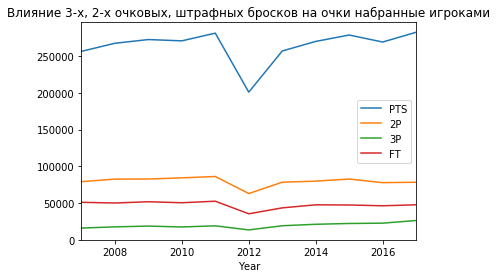

In [63]:
player_Stats5.plot()
plt.title('Влияние 3-х, 2-х очковых, штрафных бросков на очки набранные игроками')

Для оценки структуры суммарных набранных очков в разрезе времени воспользовался линейной диаграммой. Как можно заметить, в 2012 году было резкое снижение всех трех показателей. Данное явление стало результатом всеобщего локаута в лиге NBA.

In [33]:
import seaborn as sns

In [51]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


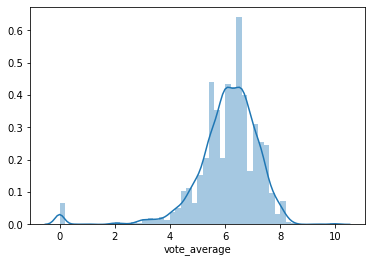

In [55]:
sns.distplot(df.vote_average)

Для нахождения частоты и плотности распределения уровня средних оценок проставленных фильмам, наиболее полно отражает гистограмма.

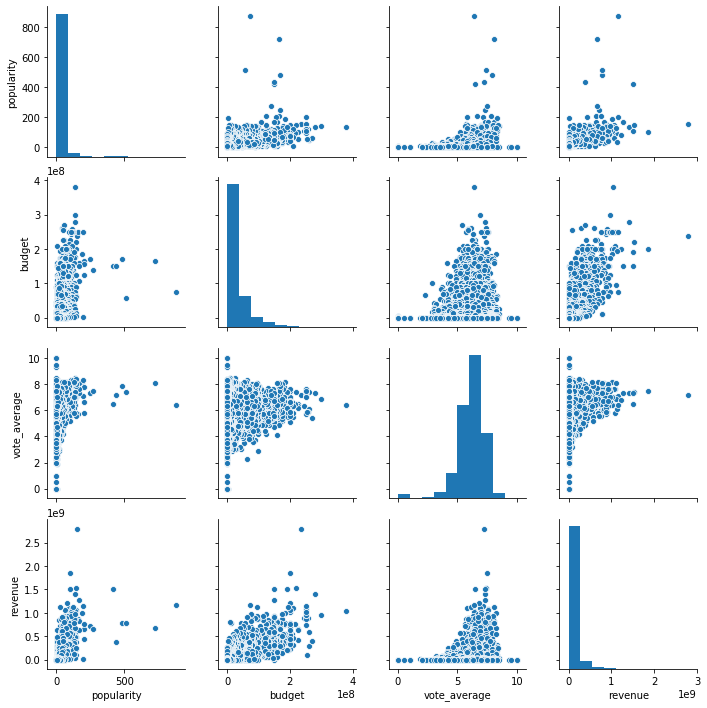

In [65]:
sns_plot = sns.pairplot(
    df[['popularity', 'budget', 'vote_average', 'revenue']])
sns_plot

С помощью матрицы диаграмм pair plot можно произвести групповой анализ взамосвязи различных признаков. Обращает на себя внимание, что основную массу выручки всей киноиндустрии приносят фильмы со сравнительно средними бюджетами. 